<h1> <center> <b> Phishing Website Detection by Deep Learning Techniques : MODULE_2</b></h1>

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data=pd.read_csv('/content/phishing.csv')
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,0
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,0
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
from sklearn.model_selection import train_test_split
X = data.copy()

y = X.pop('class')

X = data.drop(columns=['Index','class'])

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

input_shape = [X_train.shape[1]]
print("Input shape is ", input_shape)
X.head()

Input shape is  [30]


,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1


# **CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy',keras.metrics.Precision(),keras.metrics.Recall()],
    
)

In [16]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
17/17 [==============================] - 3s 55ms/step - loss: 0.2919 - binary_accuracy: 0.8864 - precision_3: 0.9064 - recall_3: 0.8876 - val_loss: 0.3609 - val_binary_accuracy: 0.8954 - val_precision_3: 0.8465 - val_recall_3: 0.9922
Epoch 2/200
17/17 [==============================] - 1s 40ms/step - loss: 0.1754 - binary_accuracy: 0.9309 - precision_3: 0.9324 - recall_3: 0.9443 - val_loss: 0.3847 - val_binary_accuracy: 0.8444 - val_precision_3: 0.7820 - val_recall_3: 0.9994
Epoch 3/200
17/17 [==============================] - 1s 39ms/step - loss: 0.1539 - binary_accuracy: 0.9370 - precision_3: 0.9361 - recall_3: 0.9519 - val_loss: 0.3786 - val_binary_accuracy: 0.8292 - val_precision_3: 0.7654 - val_recall_3: 1.0000
Epoch 4/200
17/17 [==============================] - 1s 40ms/step - loss: 0.1274 - binary_accuracy: 0.9467 - precision_3: 0.9486 - recall_3: 0.9560 - val_loss: 0.3503 - val_binary_accuracy: 0.8376 - val_precision_3: 0.7743 - val_recall_3: 1.0000
Epoch 5/200
17/1

# Evaluation Metrics

Best Test Accuracy: 0.9732272028923035
Best Test Loss: 0.07192831486463547
Best Recall: 1.0
Best Precision: 0.9749670624732971


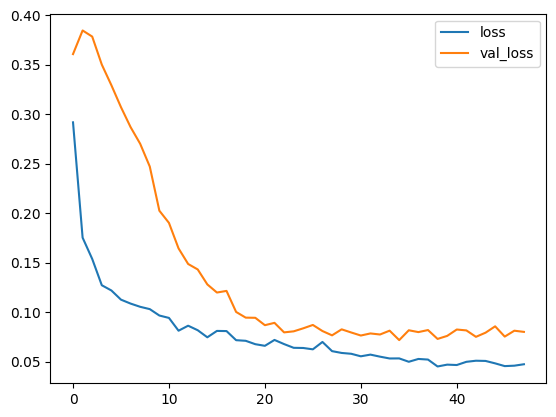

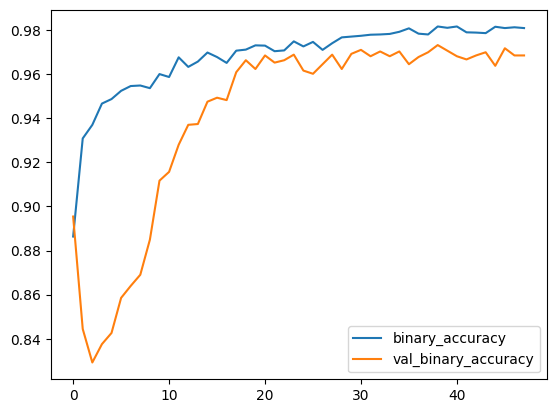

In [23]:
cnn_df = pd.DataFrame(history.history)
cnn_df.loc[0:, ['loss', 'val_loss']].plot()
cnn_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(f"Best Test Accuracy: {cnn_df['val_binary_accuracy'].max()}"+\
      f"\nBest Test Loss: {cnn_df['val_loss'].min()}" +\
      f"\nBest Recall: {cnn_df['val_recall_3'].max()}" +\
      f"\nBest Precision: {cnn_df['val_precision_3'].max()}"
)

**END OF MODULE2**

<h1> <p> <center> CONCLUSION </center> </h1> 

1. The final take away form this project is to explore various machine learning and deep learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features. 
2. Here i learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
4. In Deep Learning : CNN Model classify the URL upto 97.84% Gradient Boosting Classifier currectly classify URL upto 100% respective classes and hence reduces the chance of malicious attachments. </p>
